In [125]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

import seaborn as sns

sns.set()
%matplotlib inline

In [126]:
df_data = pd.read_csv('should-this-loan-be-approved-or-denied/SBAnational.csv', low_memory=False, sep=',')

In [127]:
print('Number of instances: %d' % df_data.shape[0])
print('Number of attributes: %d' % df_data.shape[1])

Number of instances: 899164
Number of attributes: 27


In [102]:
df_target = pd.DataFrame(df_data['MIS_Status'].value_counts())
df_target.index = ['APPROVE', 'DENY']
df_target = df_target.transpose()

_ax = sns.barplot(data=df_target)

_ax.set_ylabel('Number of loans')
#_ax.set_xlabel('Approve or deny?')

_fig = _ax.get_figure()
_fig.set_size_inches(3,5)
_fig.savefig('g_loan_hist_approve.svg')

In [6]:
df_data2 = df_data.copy()
df_data2 = df_data2.drop('ChgOffDate', axis=1)

print('Missing ChgOffDate values: %d' % df_data['ChgOffDate'].isnull().value_counts()[1])
print('Present: %d' % (df_data.shape[0] - df_data['ChgOffDate'].isnull().value_counts()[1]))
print((100/df_data.shape[0]) * df_data.isnull().any(axis=1).value_counts()[1])
print()
print('Rows with missing values(total=%d): %d' % (df_data2.shape[0], df_data2.isnull().any(axis=1).value_counts()[1]))
print((100/df_data2.shape[0]) * df_data2.isnull().any(axis=1).value_counts()[1])


Missing ChgOffDate values: 736465
Present: 162699
82.10882553127128

Rows with missing values(total=899164): 12924
1.4373351246268757


In [128]:
_ax = df_data['Term'].hist(bins = 40, log = True)
_ax.set_ylabel('Number of loans')
_ax.set_xlabel('Loan term in months')

_fig = _ax.get_figure()
_fig.savefig('g_loan_hist_loanterm.svg')

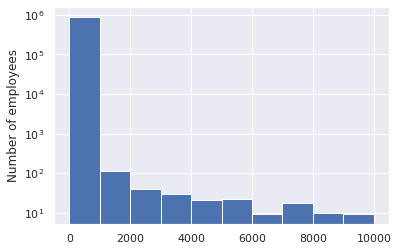

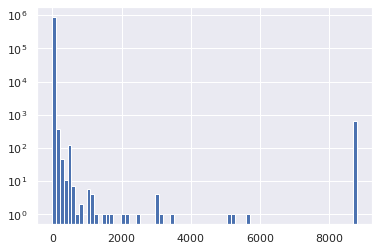

In [129]:
_ax = df_data['NoEmp'].hist(bins = 10, log = True)
_ax.set_ylabel('Number of companies')
_ax.set_ylabel('Number of employees')
_fig = _ax.get_figure()
_fig.savefig('g_loan_hist_numempl.svg')
plt.show()


df_data['CreateJob'].hist(bins = 80, log = True)
plt.show()
df_data['RetainedJob'].hist(bins = 80, log = True)
plt.show()

In [101]:
print('NoEmp [%d-%d]' % (df_data['NoEmp'].min(), df_data['NoEmp'].max()))
print('RetainedJob [%d-%d]' % (df_data['RetainedJob'].min(), df_data['RetainedJob'].max()))
print('FranchiseCode [%d-%d]' % (df_data['FranchiseCode'].min(), df_data['FranchiseCode'].max()))
print('NAICS [%d-%d]' % (df_data['NAICS'].min(), df_data['NAICS'].max()))
print('Term [%d-%d]' % (df_data['Term'].min(), df_data['Term'].max()))
print('Term [%s-%s]' % (df_data['DisbursementGross'].min(), df_data['DisbursementGross'].max()))



display(df_data['BankState'].value_counts())
display(df_data['CreateJob'].value_counts())

display(df_data['RevLineCr'].value_counts())

NoEmp [0-9999]
RetainedJob [0-9500]
FranchiseCode [0-99999]
NAICS [0-928120]
Term [0-569]
Term [$0.00 -$999,999.00 ]


CA    118116
NC     79514
IL     65908
OH     58461
SD     51095
TX     47790
RI     45366
NY     39592
VA     29002
DE     24537
MN     19960
UT     18997
PA     17081
WI     15416
MO     14861
MA     13913
GA     13812
FL     13810
AL     12134
OR     11374
WA     10693
CO     10582
CT      9917
IA      9866
NJ      9436
KS      8876
MT      7860
IN      7623
SC      7472
MI      7369
OK      7326
MD      7016
NH      6807
AR      6322
MS      5942
TN      5620
NE      5337
ND      5113
LA      5062
VT      4757
NM      4422
KY      4382
NV      4325
ID      4314
DC      4003
AZ      3957
ME      3691
HI      2991
WY      2168
WV      2007
AK      1439
PR       156
GU         5
AN         1
EN         1
VI         1
Name: BankState, dtype: int64

0       629248
1        63174
2        57831
3        28806
4        20511
         ...  
171          1
169          1
166          1
164          1
1530         1
Name: CreateJob, Length: 246, dtype: int64

N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
.         1
,         1
5         1
7         1
Q         1
3         1
4         1
-         1
A         1
Name: RevLineCr, dtype: int64

In [86]:
df_attributes = pd.DataFrame(df_data.columns, columns=['Attribute'])
df_attributes['Type'] = 'CAT'
df_attributes['Range'] = 'RANGE'
df_attributes['Description'] = 'desc'

df_attributes['Group'] = df_attributes['Attribute'] + 'XXX'
df_attributes['Group'].iloc[0] = 'Loan (Application)'

df_attributes['Group'].iloc[2:5] = 'Borrower/Address'
df_attributes['Group'].iloc[16] = 'Borrower/Address' # UrbanRural

df_attributes['Group'].iloc[5:7] = 'Bank'

df_attributes['Group'].iloc[1] = 'Borrower/Company' # Name
df_attributes['Group'].iloc[7] = 'Borrower/Company' # NAICS
df_attributes['Group'].iloc[11:16] = 'Borrower/Company'
# RevLineCr
df_attributes['Group'].iloc[17] = 'Borrower/Company'
df_attributes['Description'].iloc[17] = 'Whether this company has a revolving line of credit or not'

df_attributes['Group'].iloc[8:11] = 'Loan (Approval)'
df_attributes['Group'].iloc[20:22] = 'Loan (Approval)'

df_attributes['Group'].iloc[10] = 'Loan (Application)'
# LowDoc
df_attributes['Group'].iloc[18] = 'Loan (Application)'
df_attributes['Description'].iloc[18] = '“Yes” indicates loans with a one-page application'

df_attributes['Group'].iloc[19] = 'Loan (Closed)'
df_attributes['Group'].iloc[22:25] = 'Loan (Closed)'
df_attributes['Group'].iloc[25:27] = 'Loan (Approval)'


df_attributes = df_attributes.set_index(['Group', 'Attribute'])
display(df_attributes)






df_attributes = df_attributes.sort_index()

df_attributes
display(df_attributes)
print(df_attributes.to_latex())

Type  Range  \
Group              Attribute                       
Loan (Application) LoanNr_ChkDgt      CAT  RANGE   
Borrower/Company   Name               CAT  RANGE   
Borrower/Address   City               CAT  RANGE   
                   State              CAT  RANGE   
                   Zip                CAT  RANGE   
Bank               Bank               CAT  RANGE   
                   BankState          CAT  RANGE   
Borrower/Company   NAICS              CAT  RANGE   
Loan (Approval)    ApprovalDate       CAT  RANGE   
                   ApprovalFY         CAT  RANGE   
Loan (Application) Term               CAT  RANGE   
Borrower/Company   NoEmp              CAT  RANGE   
                   NewExist           CAT  RANGE   
                   CreateJob          CAT  RANGE   
                   RetainedJob        CAT  RANGE   
                   FranchiseCode      CAT  RANGE   
Borrower/Address   UrbanRural         CAT  RANGE   
Borrower/Company   RevLineCr          CAT  RANGE   
Loan (Application) LowDoc             CAT  RANGE   
Loan (Closed)      ChgOffDate         CAT  RANGE   
Loan (Approval)    DisbursementDate   CAT  RANGE   
                   DisbursementGross  CAT  RANGE   
Loan (Closed)      BalanceGross       CAT  RANGE   
                   MIS_Status         CAT  RANGE   
                   ChgOffPrinGr       CAT  RANGE   
Loan (Approval)    GrAppv             CAT  RANGE   
                   SBA_Appv           CAT  RANGE   

                                                                            Description  
Group              Attribute                                                             
Loan (Application) LoanNr_ChkDgt                                                   desc  
Borrower/Company   Name                                                            desc  
Borrower/Address   City                                                            desc  
                   State                                                           desc  
                   Zip                                                             desc  
Bank               Bank                                                            desc  
                   BankState                                                       desc  
Borrower/Company   NAICS                                                           desc  
Loan (Approval)    ApprovalDate                                                    desc  
                   ApprovalFY                                                      desc  
Loan (Application) Term                                                            desc  
Borrower/Company   NoEmp                                                           desc  
                   NewExist                                                        desc  
                   CreateJob                                                       desc  
                   RetainedJob                                                     desc  
                   FranchiseCode                                                   desc  
Borrower/Address   UrbanRural                                                      desc  
Borrower/Company   RevLineCr          Whether this company has a revolving line of c...  
Loan (Application) LowDoc             “Yes” indicates loans with a one-page application  
Loan (Closed)      ChgOffDate                                                      desc  
Loan (Approval)    DisbursementDate                                                desc  
                   DisbursementGross                                               desc  
Loan (Closed)      BalanceGross                                                    desc  
                   MIS_Status                                                      desc  
                   ChgOffPrinGr                                                    desc  
Loan (Approval)    GrAppv                                                          desc  
        

Type  Range  \
Group              Attribute                       
Bank               Bank               CAT  RANGE   
                   BankState          CAT  RANGE   
Borrower/Address   City               CAT  RANGE   
                   State              CAT  RANGE   
                   UrbanRural         CAT  RANGE   
                   Zip                CAT  RANGE   
Borrower/Company   CreateJob          CAT  RANGE   
                   FranchiseCode      CAT  RANGE   
                   NAICS              CAT  RANGE   
                   Name               CAT  RANGE   
                   NewExist           CAT  RANGE   
                   NoEmp              CAT  RANGE   
                   RetainedJob        CAT  RANGE   
                   RevLineCr          CAT  RANGE   
Loan (Application) LoanNr_ChkDgt      CAT  RANGE   
                   LowDoc             CAT  RANGE   
                   Term               CAT  RANGE   
Loan (Approval)    ApprovalDate       CAT  RANGE   
                   ApprovalFY         CAT  RANGE   
                   DisbursementDate   CAT  RANGE   
                   DisbursementGross  CAT  RANGE   
                   GrAppv             CAT  RANGE   
                   SBA_Appv           CAT  RANGE   
Loan (Closed)      BalanceGross       CAT  RANGE   
                   ChgOffDate         CAT  RANGE   
                   ChgOffPrinGr       CAT  RANGE   
                   MIS_Status         CAT  RANGE   

                                                                            Description  
Group              Attribute                                                             
Bank               Bank                                                            desc  
                   BankState                                                       desc  
Borrower/Address   City                                                            desc  
                   State                                                           desc  
                   UrbanRural                                                      desc  
                   Zip                                                             desc  
Borrower/Company   CreateJob                                                       desc  
                   FranchiseCode                                                   desc  
                   NAICS                                                           desc  
                   Name                                                            desc  
                   NewExist                                                        desc  
                   NoEmp                                                           desc  
                   RetainedJob                                                     desc  
                   RevLineCr          Whether this company has a revolving line of c...  
Loan (Application) LoanNr_ChkDgt                                                   desc  
                   LowDoc             “Yes” indicates loans with a one-page application  
                   Term                                                            desc  
Loan (Approval)    ApprovalDate                                                    desc  
                   ApprovalFY                                                      desc  
                   DisbursementDate                                                desc  
                   DisbursementGross                                               desc  
                   GrAppv                                                          desc  
                   SBA_Appv                                                        desc  
Loan (Closed)      BalanceGross                                                    desc  
                   ChgOffDate                                                      desc  
                   ChgOffPrinGr                                                    desc  
        

\begin{tabular}{lllll}
\toprule
              &            & Type &  Range &                                        Description \\
Group & Attribute &      &        &                                                    \\
\midrule
Bank & Bank &  CAT &  RANGE &                                               desc \\
              & BankState &  CAT &  RANGE &                                               desc \\
Borrower/Address & City &  CAT &  RANGE &                                               desc \\
              & State &  CAT &  RANGE &                                               desc \\
              & UrbanRural &  CAT &  RANGE &                                               desc \\
              & Zip &  CAT &  RANGE &                                               desc \\
Borrower/Company & CreateJob &  CAT &  RANGE &                                               desc \\
              & FranchiseCode &  CAT &  RANGE &                                               desc \\
    